Author: Jerry Wu
<br>
Date: 5/10/23
<br>
Purpose: To troubleshoot the DORA2 and verify functionailty before implementation into a GUI
<br>


In [1]:
import sys
import sma_lib.DORA2 as DORA
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import sma_lib.MAP_Parameters as params

In [2]:
xmlname = "DORA2_settings"

#read in the settings in the .xml file using hazen's Parameter Class
pars = params.Parameters(xmlname+'.xml') #par is an object of type Parameters, defined in sa_library
#to access parameters, use par.parameter name. eg par.start_frame
#note these values can be manually changed: par.frameset = 200 replaces whatever was there.
print(pars.end_frame)

-1


In [3]:
#UNIVERSAL PARAMETERS
#get the name of your folder as a string and put r in front 
# dir_path = r"D:\Jerry\code\OMMxDORA-tomerge\test_set" #select folder
# selected_csv = 'RecBCD_placeholder_intensity.csv' 
dir_path = r"D:\Jerry\code\OMMxDORA-tomerge\test_set\three_csv" #select folder
selected_csv = 'OrbitBiotin500Hz100Lz_1k_00001_trimmed.csv' 


#Change the folder directory to be the current folder's 
os.chdir(dir_path)

#Take all files in the current folder(the one we just switched to) and store it in a list through which we will iterate
my_files = os.listdir(os.getcwd())

# get current path

path_OG = os.getcwd()

In [4]:
# read CSV file into Pandas DataFrame
csv_path = os.path.join(dir_path, selected_csv)
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Add an index column as the first column
df.insert(0, 'index', range(len(df)))

# Rename the first four columns as 'index', 'X position', 'Y position', and 'Intensity'
df.columns.values[:4] = ['index','X position', 'Y position', 'Intensity']

# Display the updated DataFrame
print(df)

     index  X position  Y position  Intensity
0        0    5.957685   71.602509     1473.0
1        1    5.856493   71.599800     1463.0
2        2    5.682285   71.716194     1288.0
3        3    5.770096   71.555923     1343.0
4        4    5.678628   71.707909     1274.0
..     ...         ...         ...        ...
994    994    5.903415   71.614883     1268.0
995    995    5.746070   71.562057     1075.0
996    996    5.661738   71.722450     1113.0
997    997    5.851049   71.452736     1393.0
998    998    5.837666   71.287331     1185.0

[999 rows x 4 columns]


In [5]:
raw_data = DORA.load_csv(selected_csv,dir_path)
data, __, __ = DORA.remove_invalid_readings(raw_data)
center, radius_estimate = DORA.find_center(data)
centered_data = DORA.generate_centered_data(raw_data, center)
centered_data = DORA.calculate_angle(centered_data)
if pars.processing == "downsample":
    down_sampled_df,frame_start,frame_end = DORA.downsample(centered_data)
else:
    down_sampled_df = DORA.downsample(centered_data)


[INFO] CSV Loaded: OrbitBiotin500Hz100Lz_1k_00001_trimmed.csv
   index  Time (ms)  X position  Y position  Intensity
0      0        0.0    5.957685   71.602509     1473.0
1      1       20.0    5.856493   71.599800     1463.0
2      2       40.0    5.682285   71.716194     1288.0
3      3       60.0    5.770096   71.555923     1343.0
4      4       80.0    5.678628   71.707909     1274.0
[INFO] Number of Invalid Readings Removed: 0
[INFO] From center_hist_max, the center is [5.795606107711792, 71.58363861083984]
[INFO] Updated angle calculations have been calculated
[INFO] Data has been processed: none


In [6]:
centered_data


,index,Time (ms),X position,Y position,Intensity,X displacement (pixel),Y displacement (pixel),Radius (pixel),z-score Rad,Angle,Delta Angle,Continuous Angle
0,0,0.0,5.957685,71.602509,1473.0,0.162078,0.018870,0.163173,0.364054,353.359251,0.000000,0.000000
1,1,20.0,5.856493,71.599800,1463.0,0.060886,0.016161,0.062995,-1.042104,345.134387,-8.224865,-8.224865
2,2,40.0,5.682285,71.716194,1288.0,-0.113321,0.132556,0.174392,0.521532,229.472982,-115.661405,-123.886270
3,3,60.0,5.770096,71.555923,1343.0,-0.025510,-0.027715,0.037668,-1.397601,132.627875,-96.845106,-220.731376
4,4,80.0,5.678628,71.707909,1274.0,-0.116978,0.124270,0.170666,0.469224,226.731391,94.103516,-126.627860
...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,19860.0,5.796521,71.632866,1060.0,0.000915,0.049227,0.049236,-1.235234,271.064940,57.790107,1357.705689
994,994,19880.0,5.903415,71.614883,1268.0,0.107809,0.031245,0.112245,-0.350796,343.837561,72.772620,1430.478309
995,995,19900.0,5.746070,71.562057,1075.0,-0.049536,-0.021581,0.054033,-1.167896,156.458999,172.621439,1603.099748
996,996,19920.0,5.661738,71.722450,1113.0,-0.133868,0.138812,0.192845,0.780545,226.038713,69.579714,1672.679461


In [7]:
down_sampled_df

,index,Time (ms),X position,Y position,Intensity,X displacement (pixel),Y displacement (pixel),Radius (pixel),z-score Rad,Angle,Delta Angle,Continuous Angle
0,0,0.0,5.957685,71.602509,1473.0,0.162078,0.018870,0.163173,0.364054,353.359251,0.000000,0.000000
1,1,20.0,5.856493,71.599800,1463.0,0.060886,0.016161,0.062995,-1.042104,345.134387,-8.224865,-8.224865
2,2,40.0,5.682285,71.716194,1288.0,-0.113321,0.132556,0.174392,0.521532,229.472982,-115.661405,-123.886270
3,3,60.0,5.770096,71.555923,1343.0,-0.025510,-0.027715,0.037668,-1.397601,132.627875,-96.845106,-220.731376
4,4,80.0,5.678628,71.707909,1274.0,-0.116978,0.124270,0.170666,0.469224,226.731391,94.103516,-126.627860
...,...,...,...,...,...,...,...,...,...,...,...,...
993,993,19860.0,5.796521,71.632866,1060.0,0.000915,0.049227,0.049236,-1.235234,271.064940,57.790107,1357.705689
994,994,19880.0,5.903415,71.614883,1268.0,0.107809,0.031245,0.112245,-0.350796,343.837561,72.772620,1430.478309
995,995,19900.0,5.746070,71.562057,1075.0,-0.049536,-0.021581,0.054033,-1.167896,156.458999,172.621439,1603.099748
996,996,19920.0,5.661738,71.722450,1113.0,-0.133868,0.138812,0.192845,0.780545,226.038713,69.579714,1672.679461


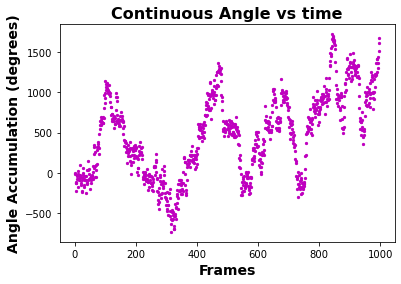

In [8]:
fig_avt, ax_avt = plt.subplots(1,1)
DORA.plot_angular_continuous(down_sampled_df, fig = fig_avt)


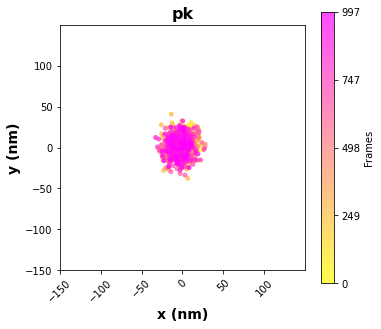

In [9]:
fig_2D, ax_2D = plt.subplots(1,1)
DORA.plot_2D_graph(down_sampled_df, fig = fig_2D)


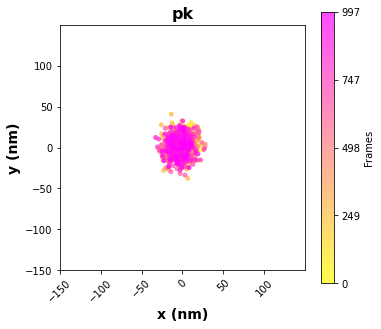

In [10]:
fig_2D_1, ax_2D = plt.subplots(1,1)
DORA.plot_2D_graph(down_sampled_df, fig = fig_2D_1)

In [11]:
df = down_sampled_df

In [12]:
slider_value = 3
df[slider_value:slider_value+50]

,index,Time (ms),X position,Y position,Intensity,X displacement (pixel),Y displacement (pixel),Radius (pixel),z-score Rad,Angle,Delta Angle,Continuous Angle
3,3,60.0,5.770096,71.555923,1343.0,-0.025510,-0.027715,0.037668,-1.397601,132.627875,-96.845106,-220.731376
4,4,80.0,5.678628,71.707909,1274.0,-0.116978,0.124270,0.170666,0.469224,226.731391,94.103516,-126.627860
5,5,100.0,5.738184,71.694267,1300.0,-0.057422,0.110629,0.124643,-0.176773,242.568492,15.837101,-110.790759
6,6,120.0,5.942694,71.683334,1335.0,0.147088,0.099696,0.177691,0.567830,325.870644,83.302151,-27.488608
7,7,140.0,5.809659,71.652473,1231.0,0.014053,0.068835,0.070255,-0.940200,281.538973,-44.331671,-71.820278
8,8,160.0,5.816856,71.602737,1501.0,0.021250,0.019099,0.028572,-1.525287,318.052187,36.513214,-35.307064
9,9,180.0,5.897564,71.555923,1463.0,0.101958,-0.027715,0.105658,-0.443260,15.207165,57.154977,21.847913
10,10,200.0,5.958594,71.648361,1368.0,0.162988,0.064723,0.175369,0.535237,338.341981,-36.865184,-15.017271
11,11,220.0,5.711886,71.585526,1363.0,-0.083720,0.001887,0.083741,-0.750894,181.291125,-157.050856,-172.068127
12,12,240.0,5.787247,71.712158,1405.0,-0.008359,0.128520,0.128791,-0.118551,266.278507,84.987382,-87.080745
